In [81]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from util.functions import Functions
from wrappers.visualizer import Visualizer

level = 'andamento-nazionale'

path_data = './data'
path_img_root =  '{path_data}/imgs/grafici/{level}'.format(path_data=path_data, level=level)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/covid19-{level}.csv'.format(path_csv=path_csv, level=level)

In [82]:
df_n = pd.read_csv(csv_in_name)
df_n;
df_n.columns

Index(['data', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati',
       'variazione_terapia_intensiva', 'variazione_ricoverati_con_sintomi',
       'variazione_totale_ospedalizzati', 'nuovi_dimessi_guariti',
       'nuovi_deceduti', 'nuovi_tamponi', 'nuovi_casi_testati', 'ti_su_to',
       'to_su_tp', 'np_su_nt', 'np_su_nct', 'var_ti_perc', 'var_pos_perc'],
      dtype='object')

In [83]:
last_date = datetime.datetime.fromisoformat(df_n.tail(1).data.array[0])
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n_30 = df_n[df_n.data > date_threshold_str].reset_index(drop=True)
df_n_30;

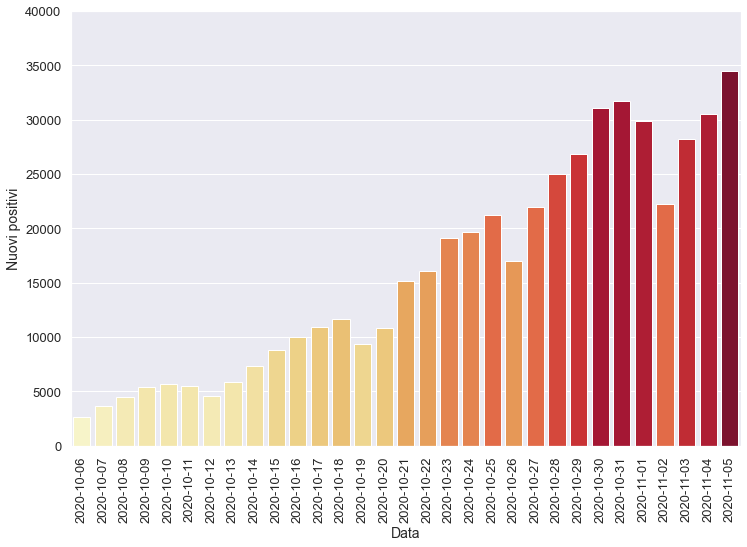

In [84]:
# New positives on new swabs in the last 30 days
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='nuovi_positivi',
    x_label='Data',
    y_label='Nuovi positivi',
    x_ticks=df_n_30.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'nuovi_positivi'})

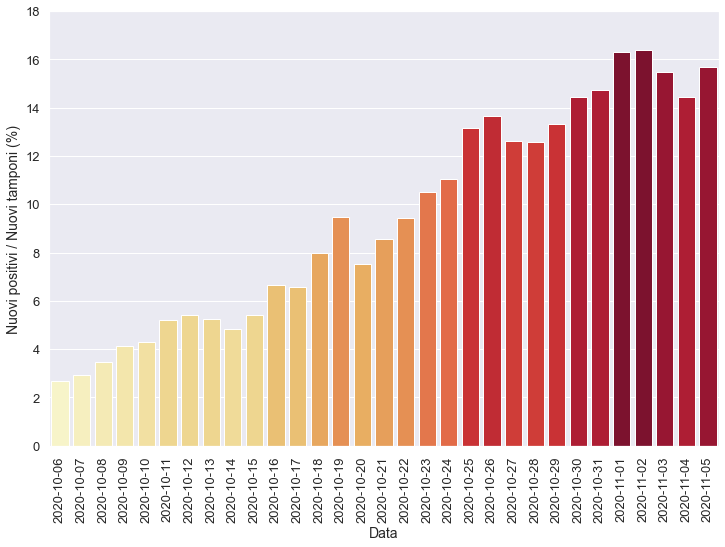

In [85]:
# New positives on new swabs in the last 30 days
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='np_su_nt',
    x_label='Data',
    y_label='Nuovi positivi / Nuovi tamponi (%)',
    x_ticks=df_n_30.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'nuovi_positivi_su_nuovi_tamponi'})

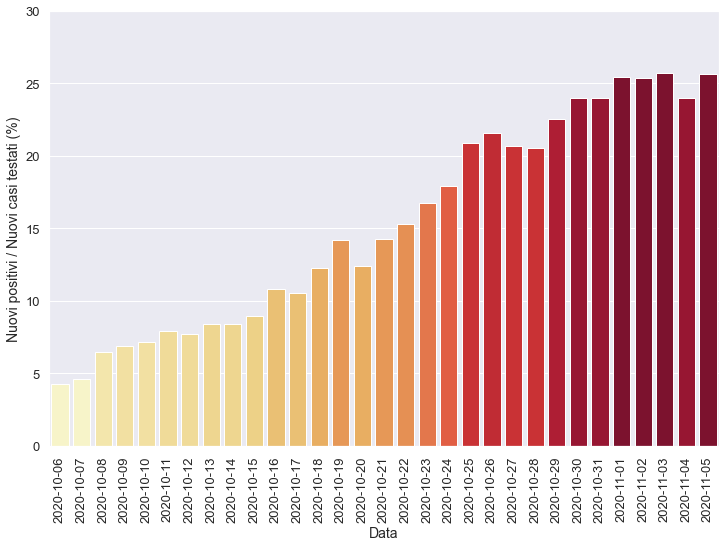

In [86]:
# New positives on new tested cases in the last 30 days
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='np_su_nct',
    x_label='Data',
    y_label='Nuovi positivi / Nuovi casi testati (%)',
    x_ticks=df_n_30.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'})

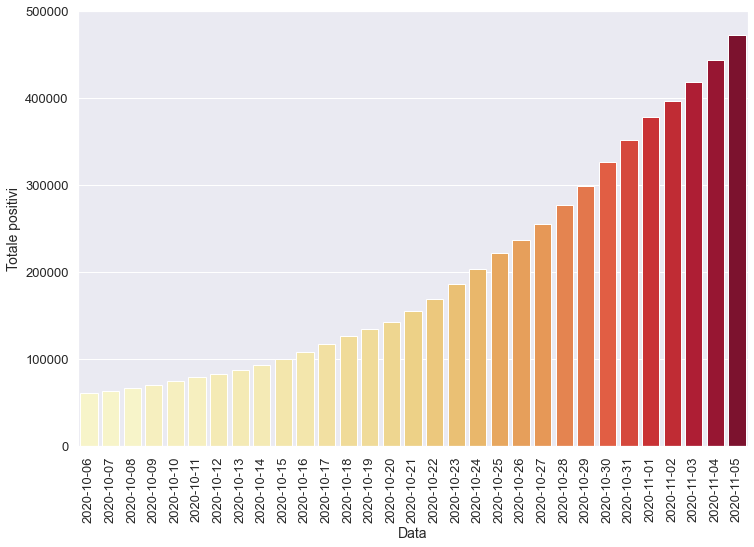

In [87]:
# Percentage of variation of positives in the last 30 days
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='totale_positivi',
    x_label='Data',
    y_label='Totale positivi',
    x_ticks=df_n_30.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'totale_positivi'})

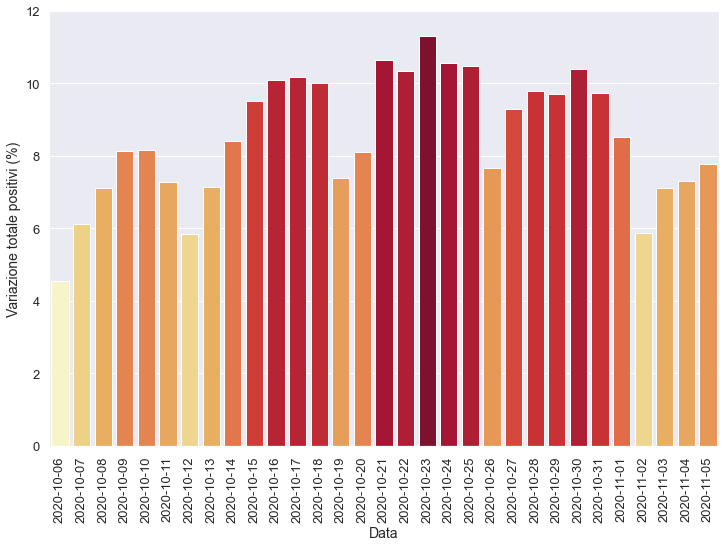

In [88]:
# Percentage of variation of positives in the last 30 days
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='var_pos_perc',
    x_label='Data',
    y_label='Variazione totale positivi (%)',
    x_ticks=df_n_30.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'variazione_totale_positivi_perc'})

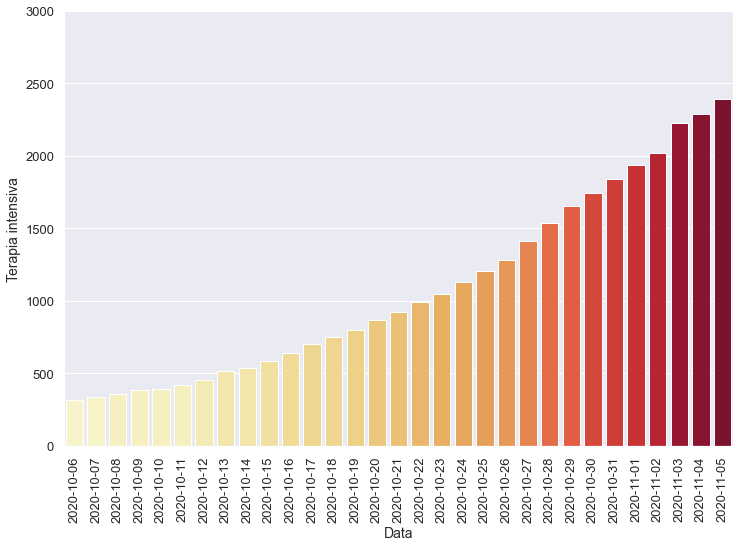

In [89]:
# Positives in ICU in the last 30 days
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='terapia_intensiva',
    x_label='Data',
    y_label='Terapia intensiva',
    x_ticks=df_n_30.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'terapia_intensiva'})

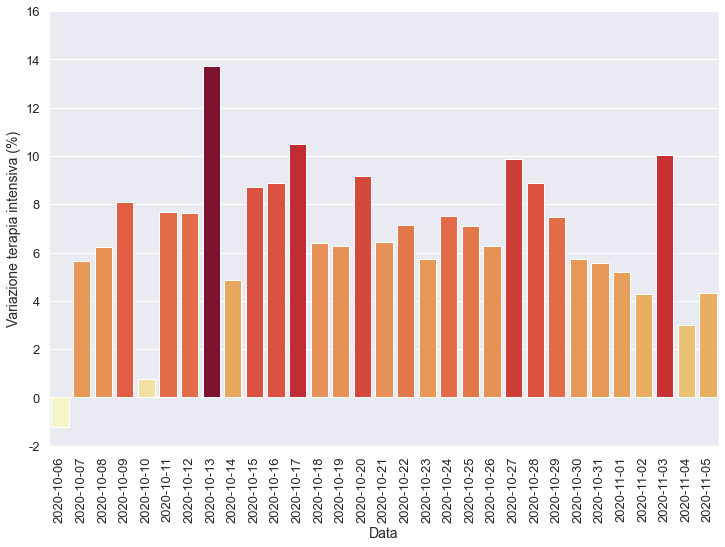

In [90]:
# Percentage of variation of positives in ICU in the last 30 days
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='var_ti_perc',
    x_label='Data',
    y_label='Variazione terapia intensiva (%)',
    x_ticks=df_n_30.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'variazione_terapia_intensiva_perc'})

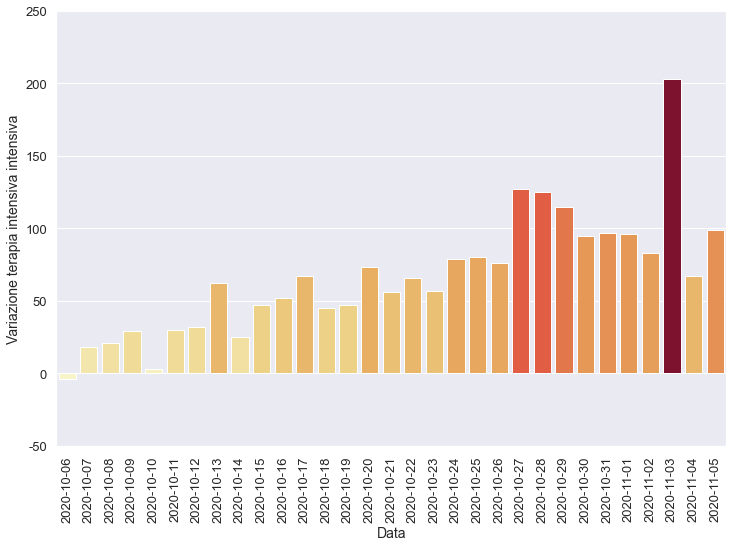

In [91]:
# Variation of positives in ICU in the last 30 days
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='variazione_terapia_intensiva',
    x_label='Data',
    y_label='Variazione terapia intensiva intensiva',
    x_ticks=df_n_30.data.apply(lambda x: x.split('T')[0]))
# , save_info={'path': path_img, 'file_name': 'variazione_terapia_intensiva_n_30'}

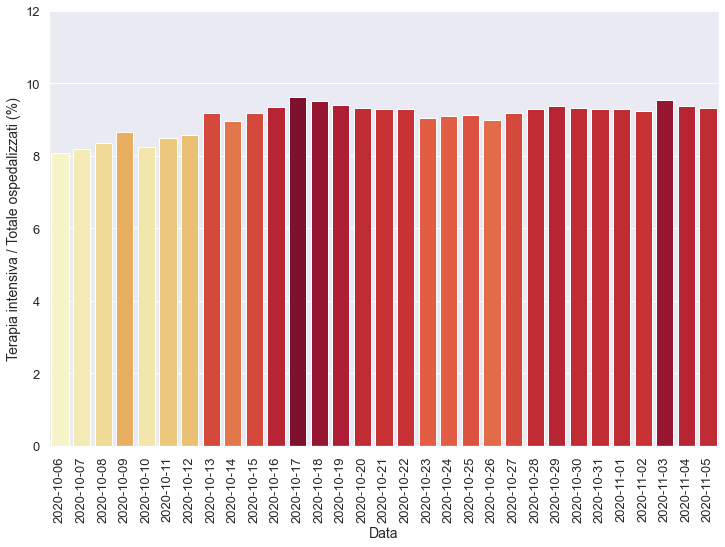

In [92]:
# Positives in ICU in the last 30 days
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='ti_su_to',
    x_label='Data',
    y_label='Terapia intensiva / Totale ospedalizzati (%)',
    x_ticks=df_n_30.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'})

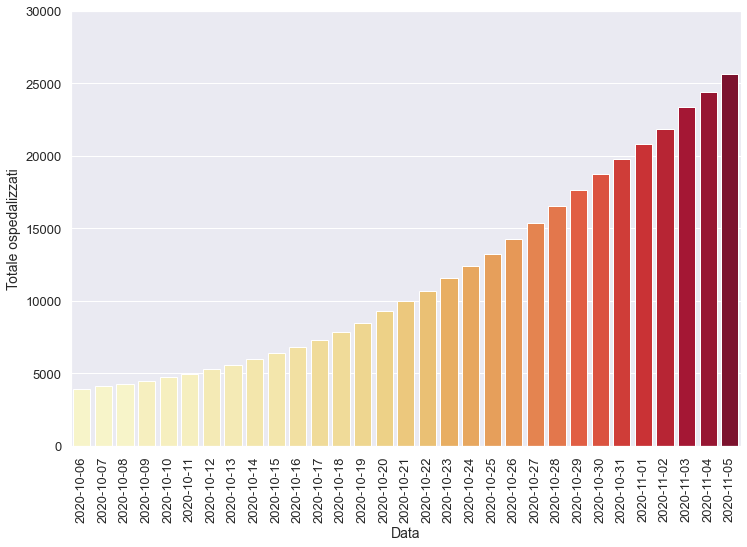

In [93]:
# Hospitalized positives in the last 30 days
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='totale_ospedalizzati',
    x_label='Data',
    y_label='Totale ospedalizzati',
    x_ticks=df_n_30.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'totale_ospedalizzati'})

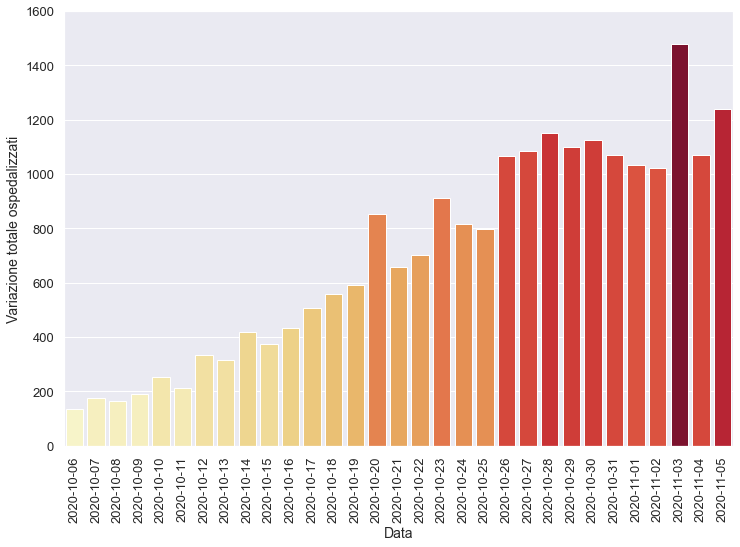

In [94]:
# Variation of hospitalized positives in the last 30 days
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='variazione_totale_ospedalizzati',
    x_label='Data',
    y_label='Variazione totale ospedalizzati',
    x_ticks=df_n_30.data.apply(lambda x: x.split('T')[0]))
# , save_info={'path': path_img, 'file_name': 'variazione_totale_ospedalizzati_n_30'}

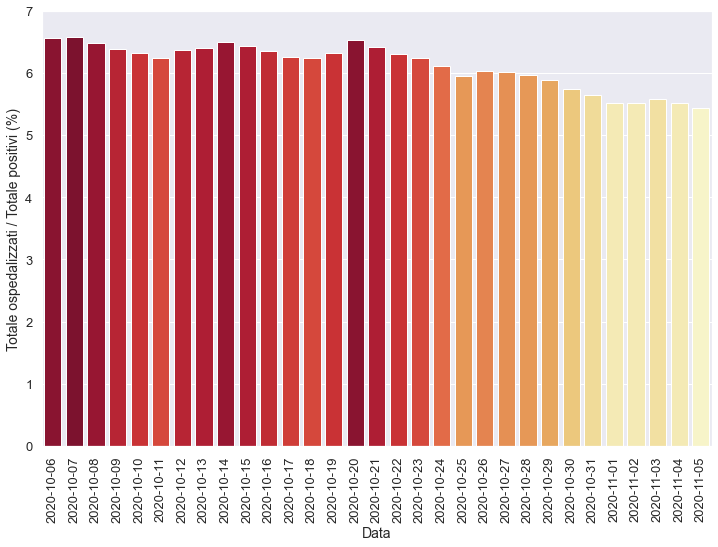

In [95]:
# Hospitalized positives in the last 30 days
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='to_su_tp',
    x_label='Data',
    y_label='Totale ospedalizzati / Totale positivi (%)',
    x_ticks=df_n_30.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'totale_ospedalizzati_su_totale_positivi'})

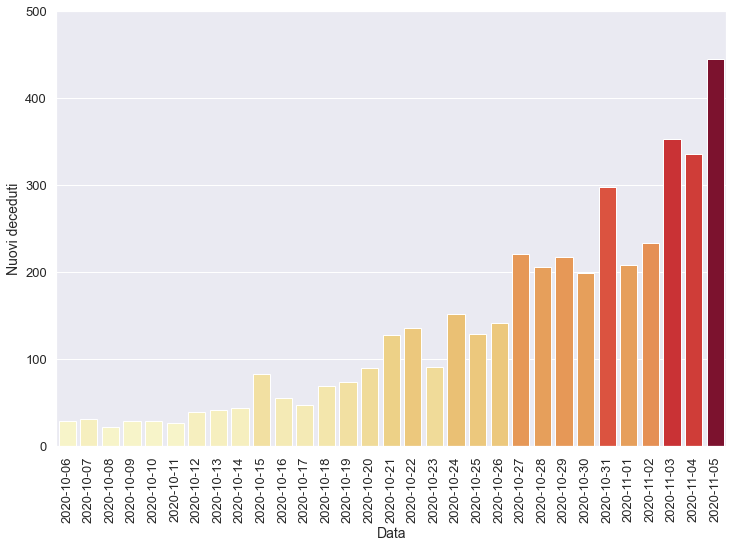

In [96]:
# New deads in the last 30 days
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='nuovi_deceduti',
    x_label='Data',
    y_label='Nuovi deceduti',
    x_ticks=df_n_30.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'nuovi_deceduti'})

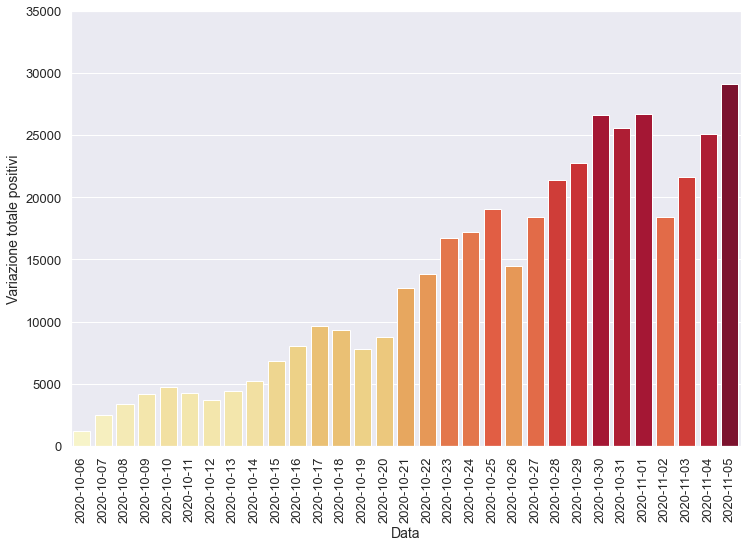

In [97]:
# Variation of total positives in in the last 30 days
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='variazione_totale_positivi',
    x_label='Data',
    y_label='Variazione totale positivi',
    x_ticks=df_n_30.data.apply(lambda x: x.split('T')[0]))
# , save_info={'path': path_img, 'file_name': 'variazione_totale_positivi_n_30'}

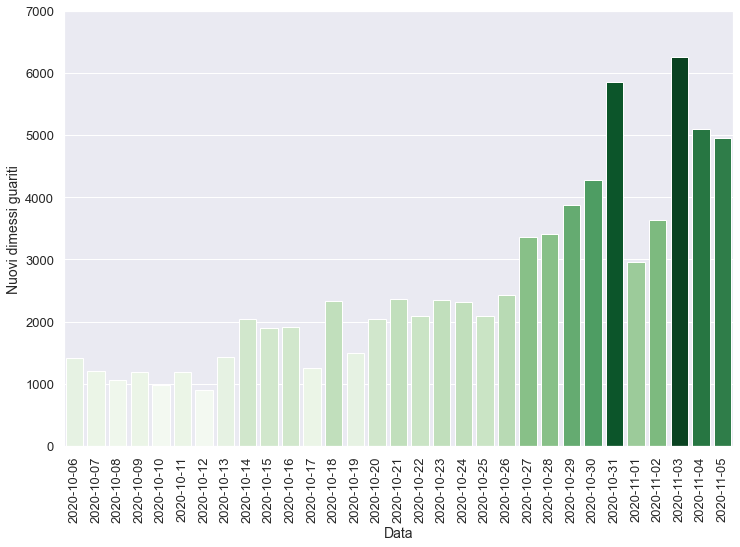

In [98]:
# New healed in the last 30 days
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='nuovi_dimessi_guariti',
    x_label='Data',
    y_label='Nuovi dimessi guariti',
    x_ticks=df_n_30.data.apply(lambda x: x.split('T')[0]),
    color='Greens',
    save_info={'path': path_img, 'file_name': 'nuovi_dimessi_guariti'})

In [99]:
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df_n_7 = df_n[df_n.data > date_threshold_str].reset_index(drop=True)
df_n_7;

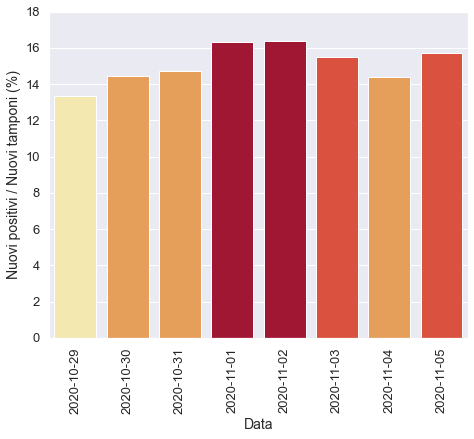

In [100]:
Visualizer.plot_hist_from_values(
    df_n_7,
    x_values='data',
    y_values='np_su_nt',
    x_label='Data',
    y_label='Nuovi positivi / Nuovi tamponi (%)',
    x_ticks=df_n_7.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
    fig_size=(7.5, 6))